DEM has 189 rows, 52 columns, and cell size 0.875048900218 m
(9828,)


/home/csherwood/miniconda/envs/ioos/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


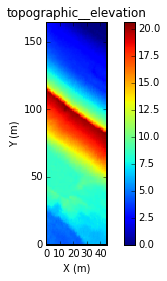

In [1]:
# sandwich wind model
import numpy as np
from landlab import RasterModelGrid

from landlab.components.diffusion.diffusion import LinearDiffuser
from landlab.plot.imshow import imshow_node_grid
from landlab.io.netcdf import *
from landlab.io import read_esri_ascii

from matplotlib import pyplot as plt
%matplotlib inline

# try to get z
mg,z = read_esri_ascii('./sandwich_bluff_utm.asc',reshape=0,name='topographic__elevation')
mg.axis_name
print('DEM has ' + str(mg.number_of_node_rows) + ' rows, ' +
                  str(mg.number_of_node_columns) + ' columns, and cell size ' + str(mg.dx)) + ' m'
# I could not figure out how to convert -9999.0 to no data, but I think making the water
# close to zero is actuapp better
z[z<-1]=-.0099
print np.shape(z)
mg.set_closed_boundaries_at_grid_edges(True, True, True, True)
plt.figure()
imshow_node_grid(mg, 'topographic__elevation', cmap='jet', grid_units=['m','m'])
plt.show()



(9828,) [ 0.05  0.05  0.05 ...,  0.05  0.05  0.05]
(189,) [  2.508   2.67    2.684   2.655   2.646   2.752   2.669   2.645   2.8
   2.926   2.991   3.027   3.069   3.156   3.299   3.393   3.381   3.51
   3.533   3.561   3.671   3.714   3.864   4.019   4.095   4.072   4.228
   4.42    4.526   4.666   4.813   4.941   5.024   5.251   5.52    5.77
   5.942   6.169   6.378   6.611   6.916   7.169   7.388   7.633   7.98
   8.179   8.396   8.66    9.017   9.401   9.805  10.237  10.71   10.987
  11.351  11.755  12.117  12.632  14.128  16.201  18.211  19.561  19.898
  19.679  19.539  19.486  19.387  19.221  18.947  18.799  18.681  18.569
  18.441  18.223  17.957  17.728  17.678  17.484  17.373  17.314  17.221
  16.972  16.581  16.173  15.974  16.068  15.931  15.615  15.327  15.227
  15.093  14.908  14.686  14.29   13.963  13.726  13.537  13.171  12.827
  12.523  12.241  11.761  11.333  10.954  10.47   10.07    9.8     9.583
   9.158   8.999   8.849   8.69    8.701   8.612   8.533   8.486   8.46

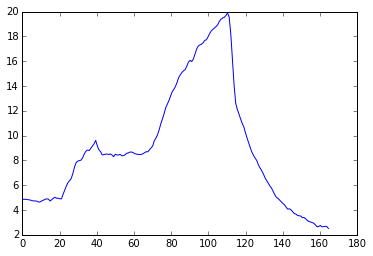

In [3]:
# Add maps of scalar properties at the nodes:

# I did this two ways...both seemed to work, but the shapes of the field arrays are different.

#    Critical shear stress for mobilization
tcrit = 0.05*np.ones_like(z)
print np.shape(tcrit),tcrit
mg.add_field('node', 'tcrit', tcrit, units='Pa', copy=True, noclobber=False)
xsect = mg.node_vector_to_raster(z, flip_vertically=True)[:,5]
ycoords = mg.node_vector_to_raster(mg.node_y, flip_vertically=True)[:,5]
print np.shape(xsect),xsect
plt.figure()
plt.plot(ycoords, xsect)
plt.show()

(18463,) [ 0.07885274  0.03999776  0.04228335 ...,  0.          0.          0.        ]


ValueError: need more than 1 value to unpack

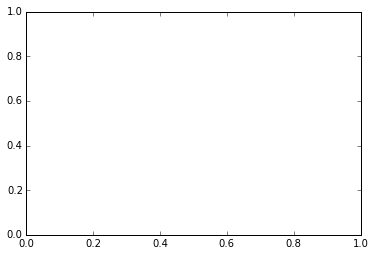

In [4]:
# Calculate the slopes from the DEM delz = (dzdx,dzdy)
# This seems to want z to be a 1D array.
# 1) why is it 2D? (I had to use reshape=1 when importing it)
# 2) Why does it seem ok to do imshow with either shape, but not .calculate_gradients...?
delz = mg.calculate_gradients_at_active_links(z)
print np.shape(delz.flat),delz
plt.figure()
plt.pcolormesh(delz, cmap='RdBu', vmin=0, vmax=5)
plt.show()



It seems like this should work too...<br>
...but no. How do we look at maps of gradients?

In [ ]:
xdelz = mg.link_vector_to_raster(delz, flip_vertically=True)[:,5]
print np.shape(xdelz),xdelz

In [ ]:
# Make up a uniform vector field of wind direction U = (u,v) (at nodes or links?)

# Calculate wind stress (function of U and delz)

# Calculate flux vector Q = (qx,qy)

# Calculate flux divergence
for i in range(25):
...     g = mg.calculate_gradients_at_active_links(z)
...     qs = -kd*g
...     dqsdx = mg.calculate_flux_divergence_at_nodes(qs)
...     dzdt = -dqsdx
...     z[interior_nodes] += dzdt[interior_nodes]*dt

Make up a uniform vector field of wind direction **U**=(u,v) at nodes 

In [7]:
# Can I make shorter names?
uxn = 'land_surface_air_flow__x_component_of_velocity'
vxn = 'land_surface_air_flow__y_component_of_velocity'
u = mg.add_zeros('node', uxn)
v = mg.add_zeros('node', vxn)
# Yes
u_at_link = mg.map_mean_of_link_nodes_to_link('land_surface_air_flow__x_component_of_velocity')
v_at_link = mg.map_mean_of_link_nodes_to_link('land_surface_air_flow__y_component_of_velocity')

u_at_link = u_at_link[mg.active_links]
v_at_link = v_at_link[mg.active_links]

print('Shape of u_at_link {shape}'.format(shape=u_at_link.shape))
print('Shape of v_at_link {shape}'.format(shape=v_at_link.shape))
print('Shape of delz {shape}'.format(shape=delz.shape))



Shape of u_at_link (18463,)
Shape of v_at_link (18463,)
Shape of delz (18463,)


In [ ]:
# Make up a uniform vector field of wind direction U = (u,v) (at nodes or links?)

# Calculate wind stress (function of U and delz)

# Calculate flux vector Q = (qx,qy)

# Calculate flux divergence